In [1]:
file = './原书代码数据/chapter6/demo/data/missing_data.xls'
data = pd.read_excel(file,header=None)
data.head()

,0,1,2
0,235.8333,324.0343,478.3231
1,236.2708,325.6379,515.4564
2,238.0521,328.0897,517.0909
3,235.9063,NaN,514.8900
4,236.7604,268.8324,NaN


In [2]:
from scipy.interpolate import lagrange
def ployinterp_column(s,n,k=5):
    y = s[list(range(n-k,n))+list(range(n+1,n+1+k))]
    y = y[y.notnull()]
    print(y.index)
    return lagrange(y.index,list(y))(n)

In [3]:
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            print('{}-{}'.format(i,j))
            data[i][j]=ployinterp_column(data[i],j)
data

0-5
Int64Index([0, 1, 2, 3, 4, 6, 7, 8, 9, 10], dtype='int64')
0-12
Int64Index([7, 8, 9, 10, 11, 13, 14, 15, 16, 17], dtype='int64')
1-3
Int64Index([0, 1, 2, 4, 5, 6, 7, 8], dtype='int64')
1-10
Int64Index([5, 6, 7, 8, 9, 11, 12, 13, 14, 15], dtype='int64')
1-19
Int64Index([14, 15, 16, 17, 18], dtype='int64')
1-20
Int64Index([15, 16, 17, 18, 19], dtype='int64')
2-4
Int64Index([0, 1, 2, 3, 5, 6, 8, 9], dtype='int64')
2-7
Int64Index([2, 3, 4, 5, 6, 8, 9, 11, 12], dtype='int64')
2-10
Int64Index([5, 6, 7, 8, 9, 11, 12, 13, 14, 15], dtype='int64')
2-16
Int64Index([11, 12, 13, 14, 15, 17, 18, 19, 20], dtype='int64')


c:\python36\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,0,1,2
0,235.833300,324.034300,478.323100
1,236.270800,325.637900,515.456400
2,238.052100,328.089700,517.090900
3,235.906300,203.462116,514.890000
4,236.760400,268.832400,493.352591
5,237.151181,404.048000,486.091200
6,237.416700,391.265200,516.233000
7,238.656300,380.824100,493.342382
8,237.604200,388.023000,435.350800
9,238.031300,206.434900,487.675000


In [4]:
file = './原书代码数据/chapter6/demo/data/model.xls'
data = pd.read_excel(file)
data.head()

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0


In [5]:
#原始数据分为训练数据、测试数据
from numpy.random import shuffle #导入随机函数shuffle  需要使用numpy的  使用random的打乱会出问题
data1 = data.values
data1
shuffle(data1)
data1

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [2, 1, 1, 1],
       ...,
       [5, 1, 2, 1],
       [2, 1, 0, 0],
       [4, 1, 0, 0]], dtype=int64)

array([[2, 1, 1, 0],
       [1, 0, 2, 0],
       [7, 1, 4, 1],
       ...,
       [3, 0, 1, 0],
       [1, 0, 0, 0],
       [5, 0, 1, 0]], dtype=int64)

In [6]:
train = data.iloc[:int(len(data1)*0.8),:]
x_train = train.iloc[:,:3]
y_train = train.iloc[:,3]
test = data.iloc[:int(len(data1)*0.2),:]
x_test = test.iloc[:,:3]
y_test = test.iloc[:,3]

In [7]:
from sklearn.tree import DecisionTreeClassifier #导入决策树模型
tree = DecisionTreeClassifier() #建立决策树模型
tree.fit(x_train,y_train) #训练

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# %load ./原书代码数据/chapter6/demo/code/cm_plot.py
def cm_plot(y, yp):
  
  from sklearn.metrics import confusion_matrix #µ¼Èë»ìÏý¾ØÕóº¯Êý

  cm = confusion_matrix(y, yp) #»ìÏý¾ØÕó
  print(cm)
  import matplotlib.pyplot as plt #µ¼Èë×÷Í¼¿â
  plt.matshow(cm, cmap=plt.cm.Greens) #»­»ìÏý¾ØÕóÍ¼£¬ÅäÉ«·ç¸ñÊ¹ÓÃcm.Greens£¬¸ü¶à·ç¸ñÇë²Î¿¼¹ÙÍø¡£
  plt.colorbar() #ÑÕÉ«±êÇ©
  
  for x in range(len(cm)): #Êý¾Ý±êÇ©
    for y in range(len(cm)):
      plt.annotate(cm[x,y], xy=(y,x), horizontalalignment='center', verticalalignment='center')  #此处xy=(y,x) 书中有误
  
  plt.xlabel('True label') #×ø±êÖá±êÇ©
  plt.ylabel('Predicted label') #×ø±êÖá±êÇ©
  return plt

[[195   3]
 [ 11  23]]


<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

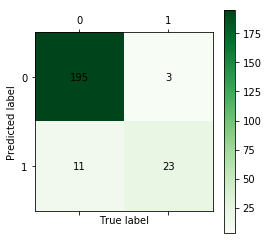

In [9]:
cm_plot(y_train,tree.predict(x_train))

In [1]:
#构建神经网络
from keras.models import Sequential #导入神经网络初始函数
from keras.layers.core import Dense,Activation #导热油神经网络层函数/激活函数
netfile = './原书代码数据/chapter5/demo/tmp/net.model'

net = Sequential()  #建了神经网络
net.add(Dense(10,input_dim=3)) #添加输入层3 到隐藏层(10)的连接
#net.add(Dense(input_dim=3,output_dim=10)) #添加输入层3 到隐藏层(10)的连接
net.add(Activation('relu'))  #隐藏层使用relu函数
net.add(Dense(1,input_dim=10)) #添加隐藏层10 到输出层(1)的连接
#net.add(Dense(input_dim=10,output_dim=1)) #添加隐藏层10 到输出层(1)的连接
net.add(Activation('sigmoid'))  #隐藏层使用sigmoid函数
net.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
net.fit(x_train,y_train,epochs=100,batch_size=1,verbose=0)
net.save_weights(netfile)


Using TensorFlow backend.


NameError: name 'x_train' is not defined

[[189   9]
 [ 11  23]]


<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

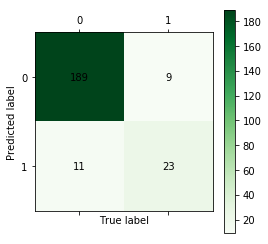

In [11]:
predict_result = net.predict_classes(x_train) #预测结果  keras用predict给出预测概率,predict_classes给出预测类别

cm_plot(y_train,predict_result)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

array([0.04795623, 0.00733013, 0.9887794 , 0.00107249, 0.01803128,
       0.00733013, 0.00910136, 0.27996218, 0.9506152 , 0.00106988,
       0.1214048 , 0.0026846 , 0.52879584, 0.00733013, 0.27996218,
       0.04795623, 0.1214048 , 0.0026846 , 0.01758674, 0.01848686,
       0.29486114, 0.27486756, 0.0017205 , 0.99290717, 0.0208681 ,
       0.00634543, 0.04649975, 0.02148553, 0.5224588 , 0.50976473,
       0.19809753, 0.52879584, 0.04913004, 0.12414202, 0.00686145,
       0.01741446, 0.19809753, 0.01758674, 0.00373945, 0.01985439,
       0.00107249, 0.0017205 , 0.27486756, 0.0026846 , 0.00910136,
       0.00106988, 0.19809753, 0.04795623, 0.09365859, 0.00733013,
       0.09365859, 0.19809753, 0.00373945, 0.05264273, 0.01848686,
       0.00910136, 0.09365859, 0.27996218], dtype=float32)

Text(0.5,0,'false positive rate')

Text(0,0.5,'true positive rate')

(0, 1.05)

(0, 1.05)

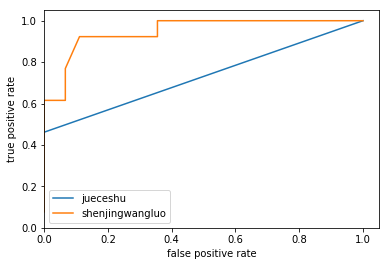

In [12]:
from sklearn.metrics import roc_curve # 导入roc曲线

#决策树
predict_result = tree.predict(x_test).reshape(len(test))
predict_result
fpr,tpr,thresholds = roc_curve(y_test,predict_result,pos_label=1)
plt.plot(fpr,tpr,label='jueceshu')

#神经网络
predict_result_n = net.predict(x_test).reshape(len(test))
predict_result_n
fpr,tpr,thresholds = roc_curve(y_test,predict_result_n,pos_label=1)
plt.plot(fpr,tpr,label='shenjingwangluo')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.legend()